In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os
plt.rcParams['figure.figsize']=(10, 6)

In [2]:
sender_mac = '34:da:b7:f5:7d:02'

In [3]:
def make_dfs(df):
    rssis = df[3].str.split('-', expand=True)
    rssis.rename(columns={1: 'rssi'}, inplace=True)

    subtypes = df[1].str.split('=', expand=True)
    subtypes.rename(columns={1: 'subtype'}, inplace=True)

    macs1 = df[4].str.split('=', expand=True)
    macs1.rename(columns={1: 'mac1'}, inplace=True)

    macs2 = df[5].str.split('=', expand=True)
    macs2.rename(columns={1: 'mac2'}, inplace=True)

    macs3 = df[6].str.split('=', expand=True)
    macs3.rename(columns={1: 'mac3'}, inplace=True)

    raw = pd.DataFrame(rssis['rssi']).join(pd.DataFrame(subtypes['subtype'])).join(pd.DataFrame(macs1['mac1'])).join(pd.DataFrame(macs2['mac2'])).join(pd.DataFrame(macs3['mac3']))
    raw['rssi'] = raw['rssi'].astype(int)

    raw = raw.loc[raw['mac2'] == sender_mac]
    raw = raw.loc[raw['mac1'] == 'ff:ff:ff:ff:ff:ff']

    data = raw['rssi'].tolist()
    res_data = []
    delata = 20
    i = 0
    while i < (len(data) - delata):
        res_data.append(sum(data[i:i + delata]) / delata)
        i += 5
        
    clean = pd.DataFrame(res_data)
    raw = pd.DataFrame(raw['rssi']).reset_index(drop=True)
    return clean, raw

In [4]:
df_stationary = pd.read_csv('/Users/argosaakan/Data/proryv/wifi_data_stationary.csv', sep=', ', header=None)
df_move = pd.read_csv('/Users/argosaakan/Data/proryv/wifi_data_move.csv', sep=', ', header=None)
df_stationary.head(3)

ipykernel_launcher:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
ipykernel_launcher:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4,5,6
0,"""PACKET TYPE=MGMT",SUBTYPE=80,CHAN=01,RSSI=-91,ADDR1=ff:ff:ff:ff:ff:ff,ADDR2=e4:ca:12:c7:a3:4e,"ADDR3=e4:ca:12:c7:a3:4e"""
1,"""PACKET TYPE=MGMT",SUBTYPE=80,CHAN=01,RSSI=-52,ADDR1=ff:ff:ff:ff:ff:ff,ADDR2=34:da:b7:f5:7d:02,"ADDR3=34:da:b7:f5:7d:02"""
2,"""PACKET TYPE=MGMT",SUBTYPE=80,CHAN=01,RSSI=-88,ADDR1=ff:ff:ff:ff:ff:ff,ADDR2=d4:60:e3:21:87:7a,"ADDR3=d4:60:e3:21:87:7a"""


In [5]:
clean_stationary, raw_stationary = make_dfs(df_stationary)
clean_move, raw_move = make_dfs(df_move)

clean_stationary.rename(columns={0:'Обработанный уровень сигнала без движения'}, inplace=True)
clean_move.rename(columns={0:'Обработанный уровень сигнала с движением'}, inplace=True)
raw_stationary.rename(columns={'rssi':'Сырой уровень сигнала без движения'}, inplace=True)
raw_move.rename(columns={'rssi':'Сырой уровень сигнала с движением'}, inplace=True)

In [6]:
max_len_cl = min(len(clean_stationary), len(clean_move))
max_len_raw = min(len(raw_stationary), len(raw_move))

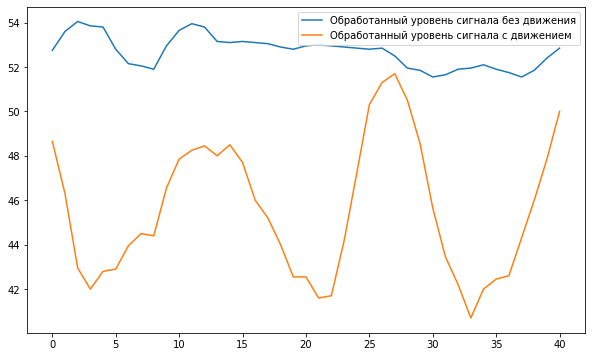

In [7]:
ax = clean_stationary.iloc[:max_len_cl].plot()
clean_move.iloc[:max_len_cl].plot(ax=ax)

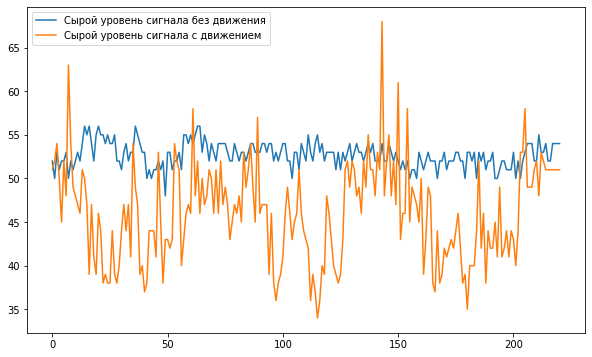

In [8]:
ax = raw_stationary.iloc[:max_len_raw].plot()
raw_move.iloc[:max_len_raw].plot(ax=ax)